# Exploratory Data Analysis on the Malahide Park Run

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
%matplotlib inline

### Import the data file.<br>Some cleaning has already been done in Notepad and Excel

In [3]:
path_to_file = 'C:\Users\Administrator\Documents\Python Scripts\examplepark.csv'
data = pd.read_csv(path_to_file)

In [4]:
path_to_file = 'C:\Users\Administrator\Documents\Python Scripts\dly532.csv'
weatherdata = pd.read_csv(path_to_file)

In [5]:
weatherdata.head()

,date,maxtp,mintp,rain,meantp
0,10-Nov-12,8.2,1.9,0.0,5.05
1,17-Nov-12,7.9,2.8,0.1,5.35
2,24-Nov-12,6.0,-2.4,8.0,1.80
3,01-Dec-12,5.5,-0.2,0.0,2.65
4,08-Dec-12,7.3,-0.2,0.0,3.55


In [6]:
data['Time'] = ((pd.to_numeric(data['Time'].str.slice(0,2)))*60)+(pd.to_numeric(data['Time'].str.slice(3,5)))+((pd.to_numeric(data['Time'].str.slice(6,8)))/60)
data['Date'] = pd.to_datetime(data['Date'],errors='coerce', format='%d-%m-%Y')
data['Age_Cat'] = pd.to_numeric(data['Age_Cat'].str.slice(2,4),errors='coerce', downcast='signed')
data['Age_Grade'] = pd.to_numeric(data['Age_Grade'].str.slice(0,5),errors='coerce')
data.head(10)

,Date,Pos,Name,Time,Age_Cat,Age_Grade,Gender,Gen_Pos,Club,Note,Total_Runs,Run_No.
0,2012-11-10,1,Michael MCSWIGGAN,18.316667,35.0,73.43,M,1.0,Portmarnock Athletic Club,First Timer!,29.0,1
1,2012-11-10,2,Alan FOLEY,18.433333,30.0,71.16,M,2.0,Raheny Shamrock AC,First Timer!,99.0,1
2,2012-11-10,3,Matt SHIELDS,18.533333,55.0,85.07,M,3.0,North Belfast Harriers,First Timer!,274.0,1
3,2012-11-10,4,David GARGAN,18.650000,40.0,73.73,M,4.0,Raheny Shamrock AC,First Timer!,107.0,1
4,2012-11-10,5,Paul SINTON-HEWITT,18.900000,50.0,79.28,M,5.0,Ranelagh Harriers,First Timer!,369.0,1
5,2012-11-10,6,John Gerard MURPHY,20.250000,40.0,68.97,M,6.0,North Belfast Harriers,First Timer!,342.0,1
6,2012-11-10,7,Conor FITZPATRICK,20.283333,20.0,64.26,M,7.0,Portmarnock Athletic Club,First Timer!,40.0,1
7,2012-11-10,8,Rachael BECK,20.450000,40.0,76.37,F,1.0,Fingal Triathlon Club,First Timer!,9.0,1
8,2012-11-10,9,Des HUSIN,20.533333,45.0,69.07,M,8.0,NaN,First Timer!,296.0,1
9,2012-11-10,10,John COLEMAN,20.816667,30.0,63.01,M,9.0,NaN,First Timer!,87.0,1


In [7]:
data['Club_Coded'] = data['Club'].isnull()

In [8]:
def converter(Club):
    if Club==True:
        return 0
    else:
        return 1

In [9]:
data['Club_Coded'] = data['Club_Coded'].apply(converter)

In [10]:
data.head(10)

,Date,Pos,Name,Time,Age_Cat,Age_Grade,Gender,Gen_Pos,Club,Note,Total_Runs,Run_No.,Club_Coded
0,2012-11-10,1,Michael MCSWIGGAN,18.316667,35.0,73.43,M,1.0,Portmarnock Athletic Club,First Timer!,29.0,1,1
1,2012-11-10,2,Alan FOLEY,18.433333,30.0,71.16,M,2.0,Raheny Shamrock AC,First Timer!,99.0,1,1
2,2012-11-10,3,Matt SHIELDS,18.533333,55.0,85.07,M,3.0,North Belfast Harriers,First Timer!,274.0,1,1
3,2012-11-10,4,David GARGAN,18.650000,40.0,73.73,M,4.0,Raheny Shamrock AC,First Timer!,107.0,1,1
4,2012-11-10,5,Paul SINTON-HEWITT,18.900000,50.0,79.28,M,5.0,Ranelagh Harriers,First Timer!,369.0,1,1
5,2012-11-10,6,John Gerard MURPHY,20.250000,40.0,68.97,M,6.0,North Belfast Harriers,First Timer!,342.0,1,1
6,2012-11-10,7,Conor FITZPATRICK,20.283333,20.0,64.26,M,7.0,Portmarnock Athletic Club,First Timer!,40.0,1,1
7,2012-11-10,8,Rachael BECK,20.450000,40.0,76.37,F,1.0,Fingal Triathlon Club,First Timer!,9.0,1,1
8,2012-11-10,9,Des HUSIN,20.533333,45.0,69.07,M,8.0,NaN,First Timer!,296.0,1,0
9,2012-11-10,10,John COLEMAN,20.816667,30.0,63.01,M,9.0,NaN,First Timer!,87.0,1,0


In [11]:
data['MeanT'] = weatherdata['meantp']
data.head()

,Date,Pos,Name,Time,Age_Cat,Age_Grade,Gender,Gen_Pos,Club,Note,Total_Runs,Run_No.,Club_Coded,MeanT
0,2012-11-10,1,Michael MCSWIGGAN,18.316667,35.0,73.43,M,1.0,Portmarnock Athletic Club,First Timer!,29.0,1,1,5.05
1,2012-11-10,2,Alan FOLEY,18.433333,30.0,71.16,M,2.0,Raheny Shamrock AC,First Timer!,99.0,1,1,5.35
2,2012-11-10,3,Matt SHIELDS,18.533333,55.0,85.07,M,3.0,North Belfast Harriers,First Timer!,274.0,1,1,1.80
3,2012-11-10,4,David GARGAN,18.650000,40.0,73.73,M,4.0,Raheny Shamrock AC,First Timer!,107.0,1,1,2.65
4,2012-11-10,5,Paul SINTON-HEWITT,18.900000,50.0,79.28,M,5.0,Ranelagh Harriers,First Timer!,369.0,1,1,3.55


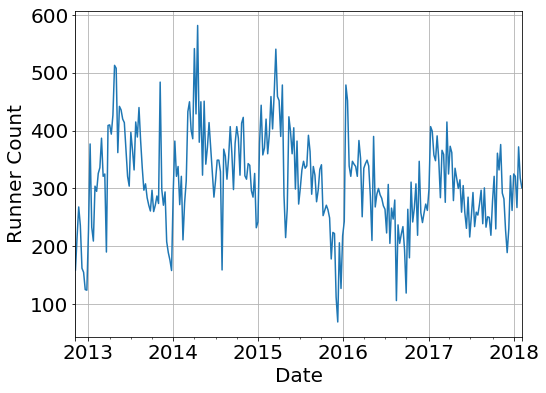

In [12]:
ax = data.groupby('Date').count()['Pos'].plot.line(figsize=(8, 6), fontsize=20)
ax.set_xlabel("Date", fontsize=20)
ax.set_ylabel("Runner Count", fontsize=20)
ax.grid('on', which='major', axis='x')
ax.grid('on', which='major', axis='y')

In [13]:
# seems to be some seasonality

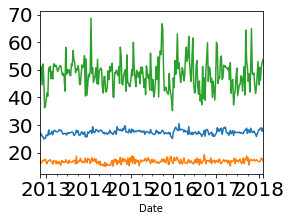

In [14]:
data.groupby('Date').mean()['Time'].plot.line(figsize=(4, 3), fontsize=20)
data.groupby('Date').min()['Time'].plot.line()
data.groupby('Date').max()['Time'].plot.line()

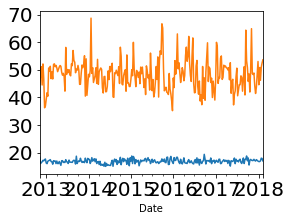

In [15]:
data.groupby('Date').min()['Time'].plot.line(figsize=(4, 3), fontsize=20)
data.groupby('Date').max()['Time'].plot.line()

In [16]:
## doesnt seem to be any change in time over time

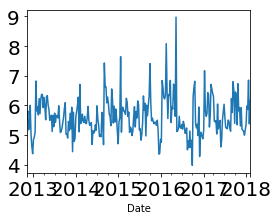

In [17]:
data.groupby('Date').std()['Time'].plot.line(figsize=(4, 3), fontsize=20)

In [18]:
df3 = data.dropna(subset=['Age_Grade'])
#df3['Age_Grade'].dropna()
df3['Rounded_Age_Grade'] = df3['Age_Grade'].apply(lambda x: x//2)
df3['Rounded_Age_Grade'] = df3['Rounded_Age_Grade'].apply(lambda x: int(x*2))

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [19]:
df3.head(20)

,Date,Pos,Name,Time,Age_Cat,Age_Grade,Gender,Gen_Pos,Club,Note,Total_Runs,Run_No.,Club_Coded,MeanT,Rounded_Age_Grade
0,2012-11-10,1,Michael MCSWIGGAN,18.316667,35.0,73.43,M,1.0,Portmarnock Athletic Club,First Timer!,29.0,1,1,5.05,72
1,2012-11-10,2,Alan FOLEY,18.433333,30.0,71.16,M,2.0,Raheny Shamrock AC,First Timer!,99.0,1,1,5.35,70
2,2012-11-10,3,Matt SHIELDS,18.533333,55.0,85.07,M,3.0,North Belfast Harriers,First Timer!,274.0,1,1,1.80,84
3,2012-11-10,4,David GARGAN,18.650000,40.0,73.73,M,4.0,Raheny Shamrock AC,First Timer!,107.0,1,1,2.65,72
4,2012-11-10,5,Paul SINTON-HEWITT,18.900000,50.0,79.28,M,5.0,Ranelagh Harriers,First Timer!,369.0,1,1,3.55,78
5,2012-11-10,6,John Gerard MURPHY,20.250000,40.0,68.97,M,6.0,North Belfast Harriers,First Timer!,342.0,1,1,7.20,68
6,2012-11-10,7,Conor FITZPATRICK,20.283333,20.0,64.26,M,7.0,Portmarnock Athletic Club,First Timer!,40.0,1,1,10.75,64
7,2012-11-10,8,Rachael BECK,20.450000,40.0,76.37,F,1.0,Fingal Triathlon Club,First Timer!,9.0,1,1,6.05,76
8,2012-11-10,9,Des HUSIN,20.533333,45.0,69.07,M,8.0,NaN,First Timer!,296.0,1,0,7.35,68
9,2012-11-10,10,John COLEMAN,20.816667,30.0,63.01,M,9.0,NaN,First Timer!,87.0,1,0,4.25,62


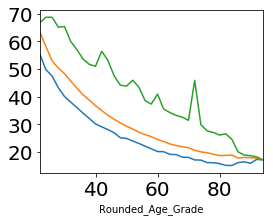

In [20]:
df3.groupby('Rounded_Age_Grade').min()['Time'].plot.line(figsize=(4, 3), fontsize=20)
df3.groupby('Rounded_Age_Grade').mean()['Time'].plot.line(figsize=(4, 3), fontsize=20)
df3.groupby('Rounded_Age_Grade').max()['Time'].plot.line(figsize=(4, 3), fontsize=20)

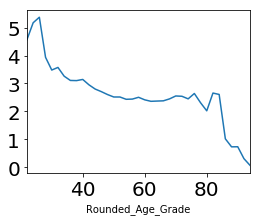

In [21]:
df3.groupby('Rounded_Age_Grade').std()['Time'].plot.line(figsize=(4, 3), fontsize=20)

In [22]:
d = {'Total Runs': data.groupby('Club').size(), \
     'Min Time': data.groupby('Club').min()['Time'], \
    'Mean Time': data.groupby('Club').mean()['Time'], \
    'Max Time': data.groupby('Club').max()['Time'], \
    'STD Time': data.groupby('Club').std()['Time']}
dfclub = pd.DataFrame(data=d)
dfclub['Club'] = dfclub.index
dfclub.head()

,Max Time,Mean Time,Min Time,STD Time,Total Runs,Club
Club,,,,,,
100 Marathon Club,25.600000,25.600000,25.600000,NaN,1,100 Marathon Club
2018 Operation Transformation,50.650000,38.561026,26.383333,6.178711,65,2018 Operation Transformation
26.2 RRC,24.933333,20.916667,16.900000,5.680424,2,26.2 RRC
3D Triathlon Club,22.100000,22.100000,22.100000,NaN,1,3D Triathlon Club
3ROC Orienteering Club,21.816667,21.816667,21.816667,NaN,1,3ROC Orienteering Club


In [23]:
dfclub.count()

Max Time      411
Mean Time     411
Min Time      411
STD Time      246
Total Runs    411
Club          411
dtype: int64

In [24]:
dfclub = dfclub[dfclub['Total Runs'] > 200]

In [25]:
dfclub.count()

Max Time      17
Mean Time     17
Min Time      17
STD Time      17
Total Runs    17
Club          17
dtype: int64

In [26]:
dfclub

,Max Time,Mean Time,Min Time,STD Time,Total Runs,Club
Club,,,,,,
Balbriggan Roadrunners,50.983333,26.463695,16.966667,4.840203,516,Balbriggan Roadrunners
Clonliffe Harriers A.C.,41.850000,21.594541,16.050000,2.880301,693,Clonliffe Harriers A.C.
Deloitte Running Club,31.783333,27.424261,18.066667,3.303256,248,Deloitte Running Club
Dinny Collins Fitness,47.050000,28.643889,18.050000,5.374780,971,Dinny Collins Fitness
Fingal Triathlon Club,50.066667,26.736711,16.066667,6.417601,597,Fingal Triathlon Club
Fingallians Athletics Club,47.950000,24.960882,18.083333,4.346983,533,Fingallians Athletics Club
Forget The Gym,47.650000,31.412350,21.016667,4.091070,390,Forget The Gym
JimFit,36.066667,28.711166,22.750000,2.351779,406,JimFit
Lusk Athletic Club,48.083333,26.859929,18.083333,4.190287,747,Lusk Athletic Club


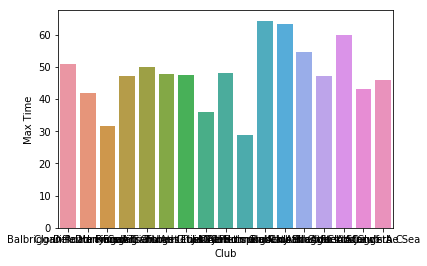

In [27]:
sns.barplot(x="Club", y="Max Time", data=dfclub);

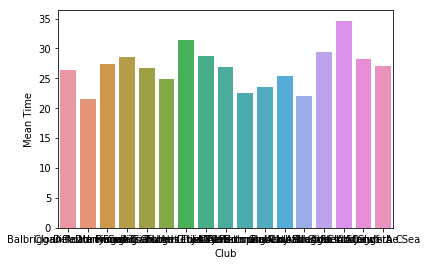

In [28]:
sns.barplot(x="Club", y="Mean Time", data=dfclub);

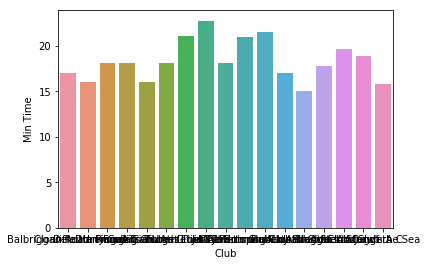

In [29]:
sns.barplot(x="Club", y="Min Time", data=dfclub);

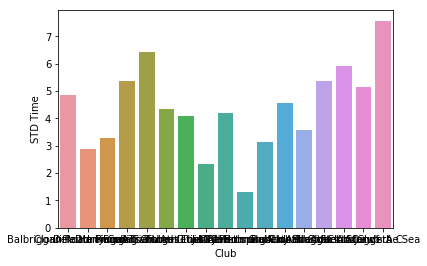

In [30]:
sns.barplot(x="Club", y="STD Time", data=dfclub);

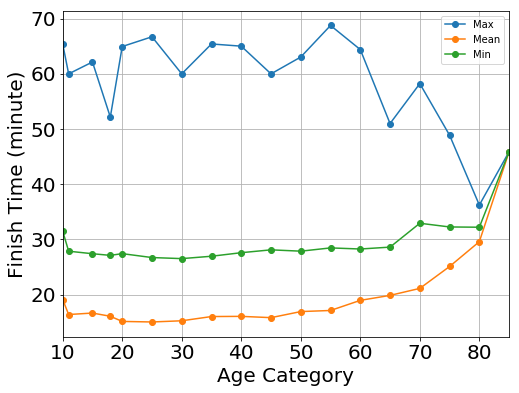

In [31]:
ax = data.groupby('Age_Cat').max()['Time'].plot.line(marker='o', figsize=(8, 6), fontsize=20)
ax = data.groupby('Age_Cat').min()['Time'].plot.line(marker='o', figsize=(8, 6), fontsize=20)
ax = data.groupby('Age_Cat').mean()['Time'].plot.line(marker='o', figsize=(8, 6), fontsize=20)
ax.legend(['Max','Mean','Min'])
ax.set_xlabel("Age Category", fontsize=20)
ax.set_ylabel("Finish Time (minute)", fontsize=20)
ax.grid('on', which='major', axis='x')
ax.grid('on', which='major', axis='y')

In [32]:
## So I can see what unstack is doing
df1 = data.groupby(['Gender','Age_Cat']).mean()['Time']
df1.unstack(level=0)

Gender,F,M
Age_Cat,,
10.0,32.879202,30.426167
11.0,31.058809,25.713185
15.0,31.332648,23.841884
18.0,28.495502,24.954148
20.0,30.145129,23.083596
25.0,29.715819,23.203273
30.0,29.722769,23.440808
35.0,29.445638,23.989655
40.0,30.441809,24.031783


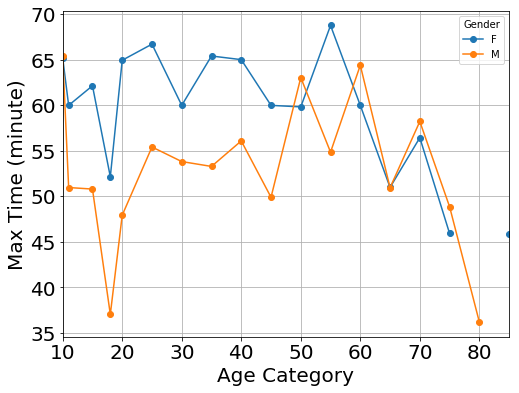

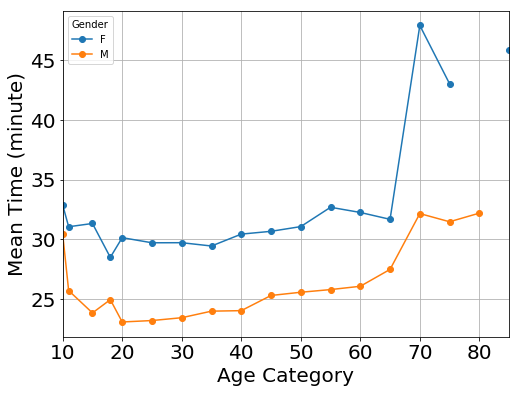

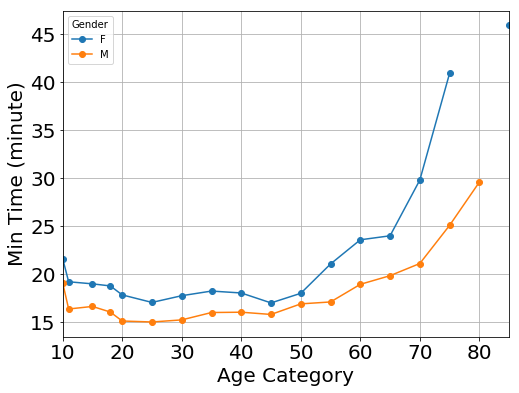

In [33]:
ax1 = data.groupby(['Gender','Age_Cat']).max()['Time'].unstack(level=0).plot.line(marker='o', figsize=(8, 6), fontsize=20)
ax1.set_xlabel("Age Category", fontsize=20)
ax1.set_ylabel("Max Time (minute)", fontsize=20)
ax1.grid('on', which='major', axis='x')
ax1.grid('on', which='major', axis='y')
ax2 = data.groupby(['Gender','Age_Cat']).mean()['Time'].unstack(level=0).plot.line(marker='o', figsize=(8, 6), fontsize=20)
ax2.set_xlabel("Age Category", fontsize=20)
ax2.set_ylabel("Mean Time (minute)", fontsize=20)
ax2.grid('on', which='major', axis='x')
ax2.grid('on', which='major', axis='y')
ax3 = data.groupby(['Gender','Age_Cat']).min()['Time'].unstack(level=0).plot.line(marker='o', figsize=(8, 6), fontsize=20)
ax3.set_xlabel("Age Category", fontsize=20)
ax3.set_ylabel("Min Time (minute)", fontsize=20)
ax3.grid('on', which='major', axis='x')
ax3.grid('on', which='major', axis='y')

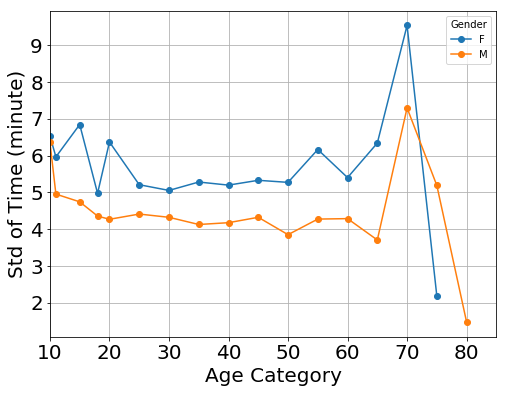

In [34]:
ax = data.groupby(['Gender','Age_Cat']).std()['Time'].unstack(level=0).plot.line(marker='o', figsize=(8, 6), fontsize=20)
ax.set_xlabel("Age Category", fontsize=20)
ax.set_ylabel("Std of Time (minute)", fontsize=20)
ax.grid('on', which='major', axis='x')
ax.grid('on', which='major', axis='y')

In [35]:
x = data.groupby('Date').count()['Pos']
ymax = data.groupby('Date').max()['Time']
ymean = data.groupby('Date').mean()['Time']
ymin = data.groupby('Date').min()['Time']

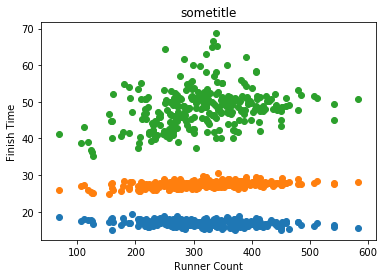

In [36]:
plt.scatter(x,ymin)
plt.scatter(x,ymean)
plt.scatter(x,ymax)
plt.title('sometitle')
plt.xlabel('Runner Count')
plt.ylabel('Finish Time')
plt.show()

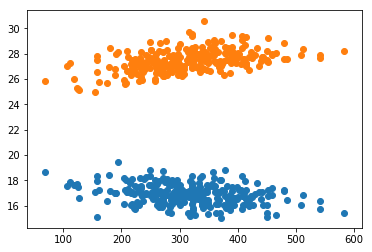

In [37]:
plt.scatter(x,ymin)
plt.scatter(x,ymean)
plt.show()

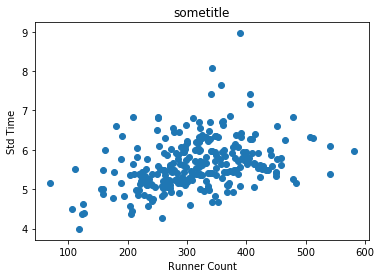

In [38]:
ystd = data.groupby('Date').std()['Time']
plt.scatter(x,ystd)
plt.title('sometitle')
plt.xlabel('Runner Count')
plt.ylabel('Std Time')
plt.show()

In [39]:
data.groupby('Gender').count()

,Date,Pos,Name,Time,Age_Cat,Age_Grade,Gen_Pos,Club,Note,Total_Runs,Run_No.,Club_Coded,MeanT
Gender,,,,,,,,,,,,,
F,36091,36091,36091,36091,36087,35715,36091,11862,36091,36088,36091,36091,104
M,37228,37228,37228,37228,37228,36855,37228,9031,37228,37228,37228,37228,156


In [40]:
dft = data.groupby(['Date','Gender']).count()['Pos']
dft = dft.unstack()
dft['Ratio'] = dft['M']/dft['F']
dft['Date'] = dft.index
dft.head()

Gender,F,M,Ratio,Date
Date,,,,
2012-11-10,81,69,0.851852,2012-11-10
2012-11-17,85,117,1.376471,2012-11-17
2012-11-24,122,131,1.073770,2012-11-24
2012-12-01,90,132,1.466667,2012-12-01
2012-12-08,57,92,1.614035,2012-12-08


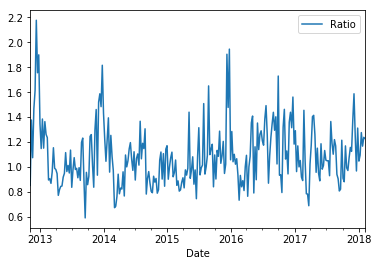

In [41]:
dft.plot(x='Date',y='Ratio')

In [42]:
dft = data.groupby(['Age_Cat','Gender']).count()['Pos']
dft = dft.unstack()
dft['Ratio'] = dft['M']/dft['F']
dft['Age_Cat'] = dft.index
dft.head()

Gender,F,M,Ratio,Age_Cat
Age_Cat,,,,
10.0,468.0,614.0,1.311966,10.0
11.0,1069.0,1599.0,1.495790,11.0
15.0,900.0,996.0,1.106667,15.0
18.0,352.0,229.0,0.650568,18.0
20.0,1006.0,635.0,0.631213,20.0


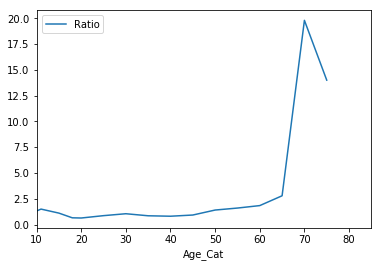

In [43]:
dft.plot(x='Age_Cat',y='Ratio')

In [44]:
dft = df3.groupby(['Rounded_Age_Grade','Gender']).count()['Pos']
dft = dft.unstack()
dft['Ratio'] = dft['M']/dft['F']
dft['Rounded_Age_Grade'] = dft.index
dft.head()

Gender,F,M,Ratio,Rounded_Age_Grade
Rounded_Age_Grade,,,,
22,4.0,1.0,0.250000,22
24,17.0,16.0,0.941176,24
26,15.0,23.0,1.533333,26
28,57.0,29.0,0.508772,28
30,125.0,48.0,0.384000,30


C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\transforms.py:661: RuntimeWarning: invalid value encountered in absolute
  inside = ((abs(dx0 + dx1) + abs(dy0 + dy1)) == 0)


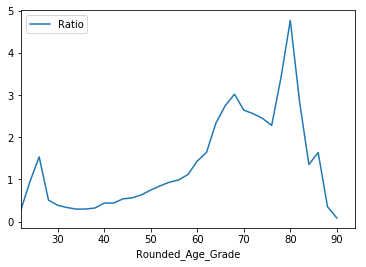

In [45]:
dft.plot(x='Rounded_Age_Grade',y='Ratio')

In [46]:
dft = data.groupby(['Date','Gender']).count()['Pos']
dft = dft.unstack()
dft['Ratio'] = dft['M']/dft['F']
dft['Count'] = dft['M']+dft['F']
dft.head()

Gender,F,M,Ratio,Count
Date,,,,
2012-11-10,81,69,0.851852,150
2012-11-17,85,117,1.376471,202
2012-11-24,122,131,1.073770,253
2012-12-01,90,132,1.466667,222
2012-12-08,57,92,1.614035,149


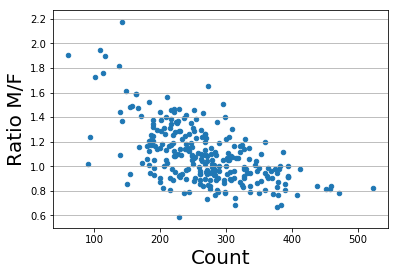

In [47]:
ax = dft.plot.scatter(x='Count',y='Ratio')
ax.set_xlabel("Count", fontsize=20)
ax.set_ylabel("Ratio M/F", fontsize=20)
#ax.grid('on', which='major', axis='x')
ax.grid('on', which='major', axis='y')

In [48]:
dft['Date']  = dft.index
dft.index = range(275)
dft.head()

Gender,F,M,Ratio,Count,Date
0,81,69,0.851852,150,2012-11-10
1,85,117,1.376471,202,2012-11-17
2,122,131,1.073770,253,2012-11-24
3,90,132,1.466667,222,2012-12-01
4,57,92,1.614035,149,2012-12-08


In [49]:
dft['MeanTemp'] = weatherdata['meantp']
dft['MaxTemp'] = weatherdata['maxtp']
dft['MinTemp'] = weatherdata['mintp']
dft['Rain(mm)'] = weatherdata['rain']
dft['maxtime'] = ymax

In [50]:
dft.head()

Gender,F,M,Ratio,Count,Date,MeanTemp,MaxTemp,MinTemp,Rain(mm),maxtime
0,81,69,0.851852,150,2012-11-10,5.05,8.2,1.9,0.0,NaN
1,85,117,1.376471,202,2012-11-17,5.35,7.9,2.8,0.1,NaN
2,122,131,1.073770,253,2012-11-24,1.80,6.0,-2.4,8.0,NaN
3,90,132,1.466667,222,2012-12-01,2.65,5.5,-0.2,0.0,NaN
4,57,92,1.614035,149,2012-12-08,3.55,7.3,-0.2,0.0,NaN


In [51]:
dd = {'Runner Count': data.groupby('Date').size(), \
     'Min Time': data.groupby('Date').min()['Time'], \
    'Mean Time': data.groupby('Date').mean()['Time'], \
    'Max Time': data.groupby('Date').max()['Time'], \
    'STD Time': data.groupby('Date').std()['Time']}
dfdate = pd.DataFrame(data=dd)
dfdate['Date'] = dfdate.index
dfdate.index = range(275)
dfdate.head()

,Max Time,Mean Time,Min Time,Runner Count,STD Time,Date
0,44.783333,27.830778,18.316667,159,5.495270,2012-11-10
1,48.000000,26.322277,16.050000,216,5.815160,2012-11-17
2,51.150000,26.752964,16.400000,268,5.177254,2012-11-24
3,44.516667,25.932583,16.716667,236,5.258924,2012-12-01
4,52.150000,25.786577,17.233333,162,6.002006,2012-12-08


In [52]:
dfdate['MeanTemp'] = weatherdata['meantp']
dfdate['MaxTemp'] = weatherdata['maxtp']
dfdate['MinTemp'] = weatherdata['mintp']
dfdate['Rain(mm)'] = weatherdata['rain']
dfdate['Ratio'] = dft['Ratio']
dfdate.head()

,Max Time,Mean Time,Min Time,Runner Count,STD Time,Date,MeanTemp,MaxTemp,MinTemp,Rain(mm),Ratio
0,44.783333,27.830778,18.316667,159,5.495270,2012-11-10,5.05,8.2,1.9,0.0,0.851852
1,48.000000,26.322277,16.050000,216,5.815160,2012-11-17,5.35,7.9,2.8,0.1,1.376471
2,51.150000,26.752964,16.400000,268,5.177254,2012-11-24,1.80,6.0,-2.4,8.0,1.073770
3,44.516667,25.932583,16.716667,236,5.258924,2012-12-01,2.65,5.5,-0.2,0.0,1.466667
4,52.150000,25.786577,17.233333,162,6.002006,2012-12-08,3.55,7.3,-0.2,0.0,1.614035


In [86]:
## could also do the ratio of club member to non members

(0.01, 112.2018454301963)

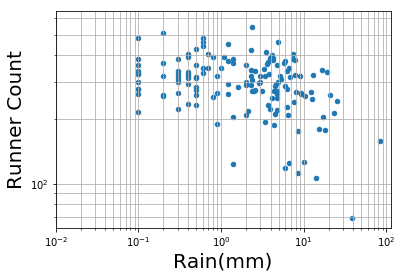

In [53]:
ax = dfdate.plot.scatter(x='Rain(mm)',y='Runner Count')

ax.set_xlabel("Rain(mm)", fontsize=20)
ax.set_ylabel("Runner Count", fontsize=20)
ax.grid('on', which='major', axis='x')
ax.grid('on', which='major', axis='y')
ax.grid('on', which='minor', axis='x')
ax.grid('on', which='minor', axis='y')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(xmin=0.01)

(-4.2073466988508059, 30)

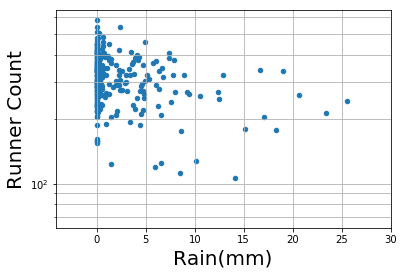

In [54]:
ax = dfdate.plot.scatter(x='Rain(mm)',y='Runner Count')

ax.set_xlabel("Rain(mm)", fontsize=20)
ax.set_ylabel("Runner Count", fontsize=20)
ax.grid('on', which='major', axis='x')
ax.grid('on', which='major', axis='y')
ax.grid('on', which='minor', axis='x')
ax.grid('on', which='minor', axis='y')
#ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(xmax=30)

In [55]:
#sns.pairplot(dfdate)

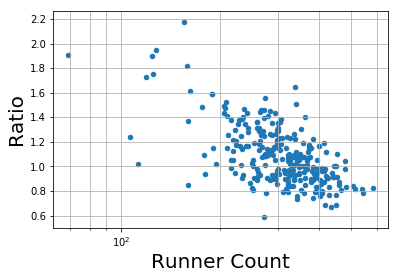

In [63]:
ax = dfdate.plot.scatter(x='Runner Count',y='Ratio')

ax.set_xlabel("Runner Count", fontsize=20)
ax.set_ylabel("Ratio", fontsize=20)
ax.grid('on', which='major', axis='x')
ax.grid('on', which='major', axis='y')
ax.grid('on', which='minor', axis='x')
ax.grid('on', which='minor', axis='y')
ax.set_xscale('log')
#ax.set_yscale('log')
#ax.set_xlim(xmax=30)

(0.01, 112.2018454301963)

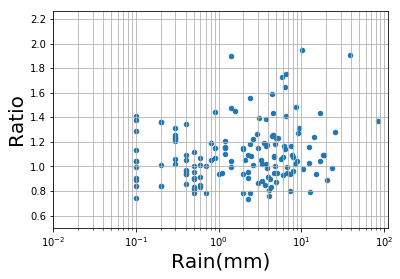

In [69]:
ax = dfdate.plot.scatter(x='Rain(mm)',y='Ratio')

ax.set_xlabel("Rain(mm)", fontsize=20)
ax.set_ylabel("Ratio", fontsize=20)
ax.grid('on', which='major', axis='x')
ax.grid('on', which='major', axis='y')
ax.grid('on', which='minor', axis='x')
ax.grid('on', which='minor', axis='y')
ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlim(xmin=0.01)

(0.01, 112.2018454301963)

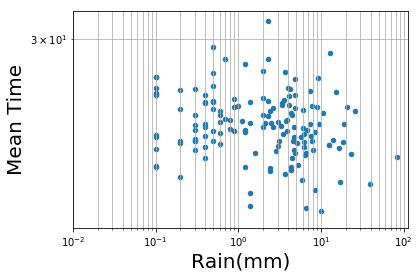

In [74]:
ax = dfdate.plot.scatter(x='Rain(mm)',y='Mean Time')

ax.set_xlabel("Rain(mm)", fontsize=20)
ax.set_ylabel("Mean Time", fontsize=20)
ax.grid('on', which='major', axis='x')
ax.grid('on', which='major', axis='y')
ax.grid('on', which='minor', axis='x')
ax.grid('on', which='minor', axis='y')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(xmin=0.01)

(0.01, 112.2018454301963)

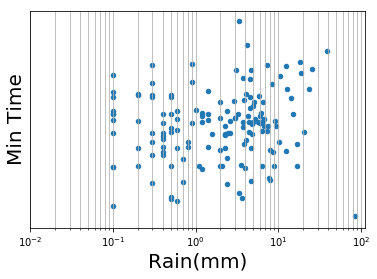

In [75]:
ax = dfdate.plot.scatter(x='Rain(mm)',y='Min Time')

ax.set_xlabel("Rain(mm)", fontsize=20)
ax.set_ylabel("Min Time", fontsize=20)
ax.grid('on', which='major', axis='x')
ax.grid('on', which='major', axis='y')
ax.grid('on', which='minor', axis='x')
ax.grid('on', which='minor', axis='y')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(xmin=0.01)

(0.01, 112.2018454301963)

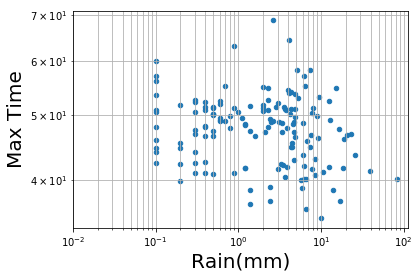

In [76]:
ax = dfdate.plot.scatter(x='Rain(mm)',y='Max Time')

ax.set_xlabel("Rain(mm)", fontsize=20)
ax.set_ylabel("Max Time", fontsize=20)
ax.grid('on', which='major', axis='x')
ax.grid('on', which='major', axis='y')
ax.grid('on', which='minor', axis='x')
ax.grid('on', which='minor', axis='y')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(xmin=0.01)

(0.01, 112.2018454301963)

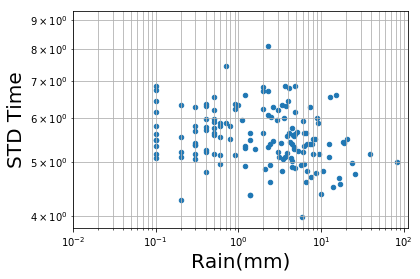

In [78]:
ax = dfdate.plot.scatter(x='Rain(mm)',y='STD Time')

ax.set_xlabel("Rain(mm)", fontsize=20)
ax.set_ylabel("STD Time", fontsize=20)
ax.grid('on', which='major', axis='x')
ax.grid('on', which='major', axis='y')
ax.grid('on', which='minor', axis='x')
ax.grid('on', which='minor', axis='y')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(xmin=0.01)

(0.01, 112.2018454301963)

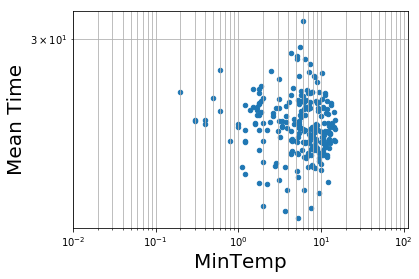

In [79]:
ax = dfdate.plot.scatter(x='MinTemp',y='Mean Time')

ax.set_xlabel("MinTemp", fontsize=20)
ax.set_ylabel("Mean Time", fontsize=20)
ax.grid('on', which='major', axis='x')
ax.grid('on', which='major', axis='y')
ax.grid('on', which='minor', axis='x')
ax.grid('on', which='minor', axis='y')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(xmin=0.01)

(0.01, 112.2018454301963)

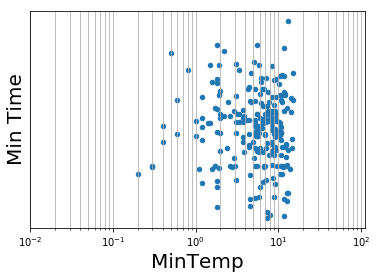

In [80]:
ax = dfdate.plot.scatter(x='MinTemp',y='Min Time')

ax.set_xlabel("MinTemp", fontsize=20)
ax.set_ylabel("Min Time", fontsize=20)
ax.grid('on', which='major', axis='x')
ax.grid('on', which='major', axis='y')
ax.grid('on', which='minor', axis='x')
ax.grid('on', which='minor', axis='y')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(xmin=0.01)

(0.01, 112.2018454301963)

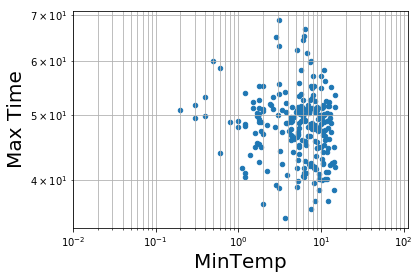

In [81]:
ax = dfdate.plot.scatter(x='MinTemp',y='Max Time')

ax.set_xlabel("MinTemp", fontsize=20)
ax.set_ylabel("Max Time", fontsize=20)
ax.grid('on', which='major', axis='x')
ax.grid('on', which='major', axis='y')
ax.grid('on', which='minor', axis='x')
ax.grid('on', which='minor', axis='y')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(xmin=0.01)

(0.01, 112.2018454301963)

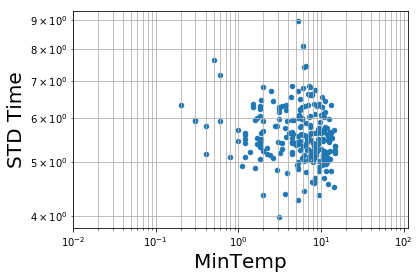

In [82]:
ax = dfdate.plot.scatter(x='MinTemp',y='STD Time')

ax.set_xlabel("MinTemp", fontsize=20)
ax.set_ylabel("STD Time", fontsize=20)
ax.grid('on', which='major', axis='x')
ax.grid('on', which='major', axis='y')
ax.grid('on', which='minor', axis='x')
ax.grid('on', which='minor', axis='y')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(xmin=0.01)

(0.01, 112.2018454301963)

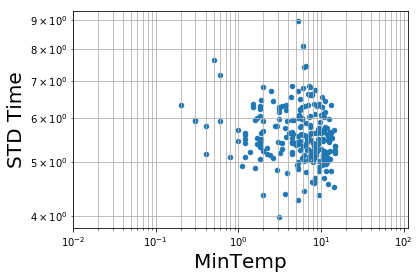

In [84]:
ax = dfdate.plot.scatter(x='MinTemp',y='STD Time')

ax.set_xlabel("MinTemp", fontsize=20)
ax.set_ylabel("STD Time", fontsize=20)
ax.grid('on', which='major', axis='x')
ax.grid('on', which='major', axis='y')
ax.grid('on', which='minor', axis='x')
ax.grid('on', which='minor', axis='y')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(xmin=0.01)

(0.01, 112.2018454301963)

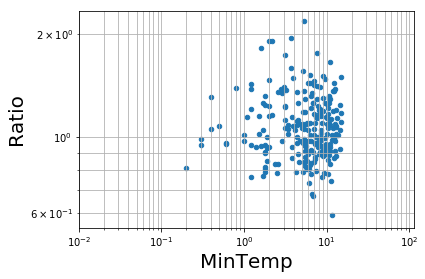

In [83]:
ax = dfdate.plot.scatter(x='MinTemp',y='Ratio')

ax.set_xlabel("MinTemp", fontsize=20)
ax.set_ylabel("Ratio", fontsize=20)
ax.grid('on', which='major', axis='x')
ax.grid('on', which='major', axis='y')
ax.grid('on', which='minor', axis='x')
ax.grid('on', which='minor', axis='y')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(xmin=0.01)

(0.01, 112.2018454301963)

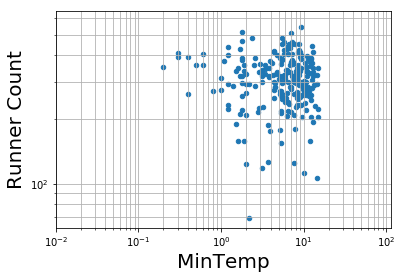

In [85]:
ax = dfdate.plot.scatter(x='MinTemp',y='Runner Count')

ax.set_xlabel("MinTemp", fontsize=20)
ax.set_ylabel("Runner Count", fontsize=20)
ax.grid('on', which='major', axis='x')
ax.grid('on', which='major', axis='y')
ax.grid('on', which='minor', axis='x')
ax.grid('on', which='minor', axis='y')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(xmin=0.01)

# End

In [15]:
df = data[:500]
#df = df.drop('Club',1)
#df = df.dropna()
#sns.pairplot(df, hue="Gender")

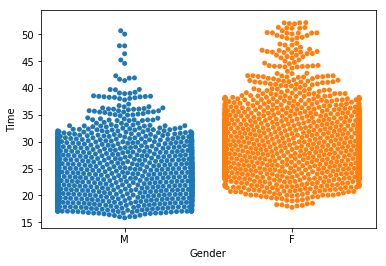

In [16]:
sns.swarmplot(x="Gender", y="Time", data=df)

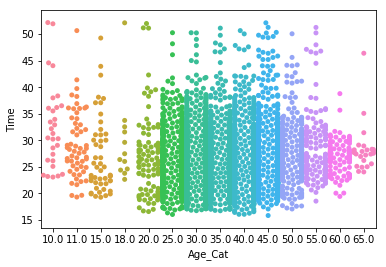

In [17]:
sns.swarmplot(x="Age_Cat", y="Time", data=df)

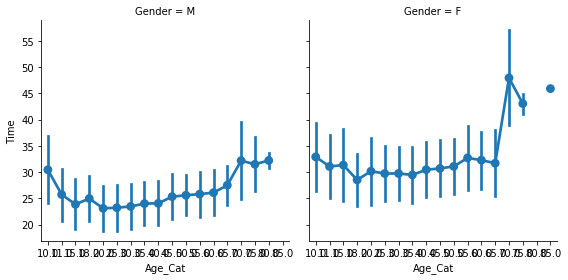

In [18]:
sns.factorplot("Age_Cat", "Time", col="Gender",
               data=data, kind="point", ci='sd')

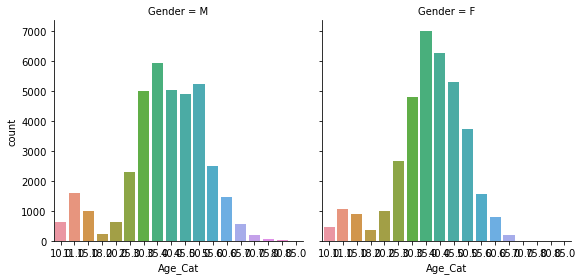

In [19]:
sns.factorplot("Age_Cat", data=data,kind='count', col="Gender")

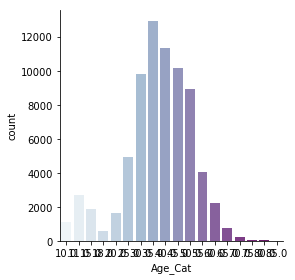

In [20]:
sns.factorplot("Age_Cat", data=data,kind='count',palette='BuPu')

In [22]:
df2 = data.dropna()
df2['Rounded_Time'] = df2['Time'].apply(lambda x: x//2)
df2['Rounded_Time'] = df2['Rounded_Time'].apply(lambda x: int(x*2))
df2['Rounded Pos'] = df2['Pos'].apply(lambda x: x//10)
df2['Rounded Pos'] = df2['Rounded Pos'].apply(lambda x: int(x*10))

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

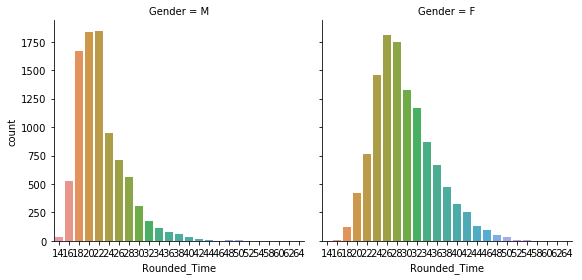

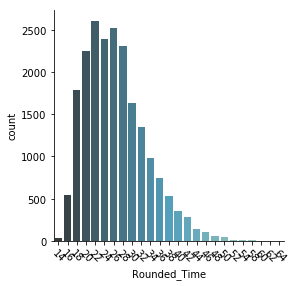

In [23]:
sns.factorplot("Rounded_Time", data=df2,kind='count', col="Gender")
sns.factorplot("Rounded_Time", data=df2,kind='count',palette='GnBu_d')
plt.xticks(rotation=-45)

In [ ]:
# Could do t test on this to show there the means are likely distinct, show the p value

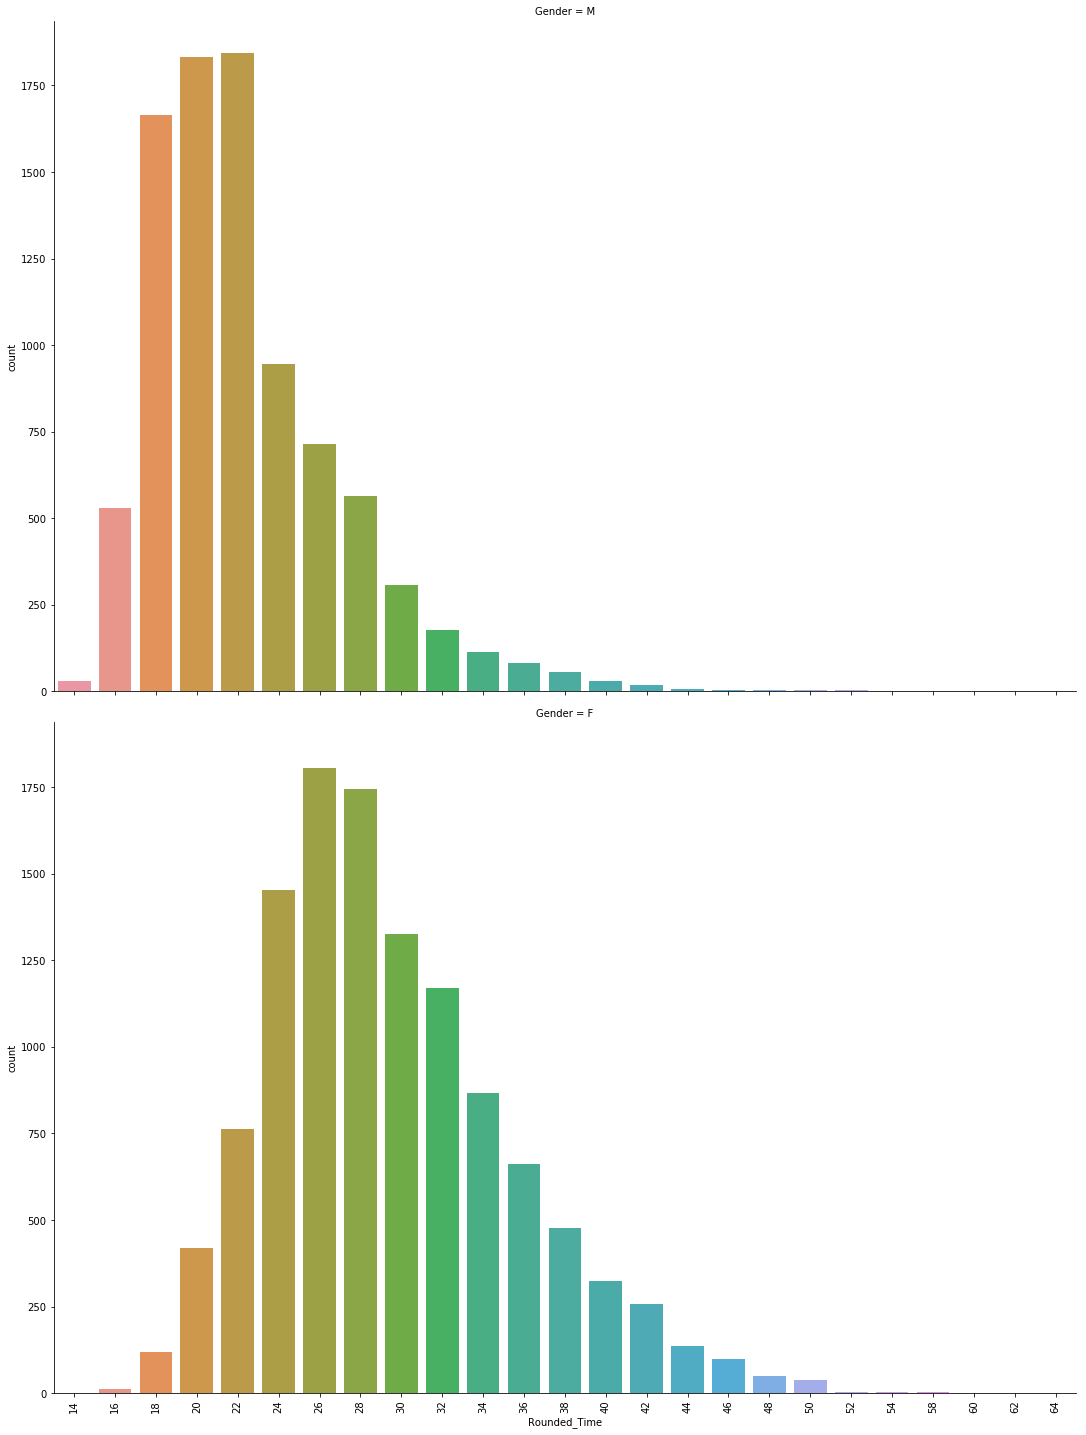

In [76]:
ax = sns.factorplot("Rounded_Time", data=df2,kind='count', row="Gender",size=10, aspect=1.5)
ax.set_xticklabels(rotation=90)

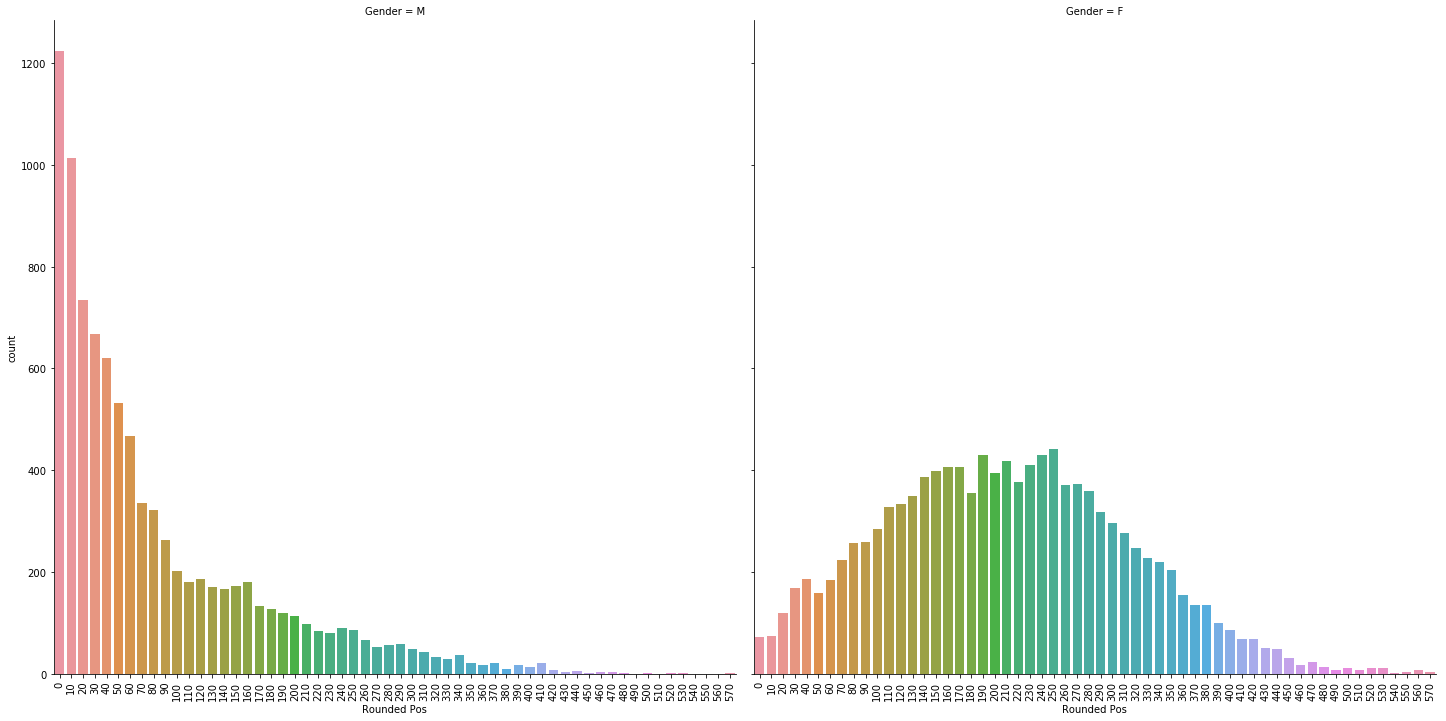

In [26]:
ax = sns.factorplot("Rounded Pos", data=df2,kind='count', col="Gender",size=10)
ax.set_xticklabels(rotation=90)

In [28]:
x = data.groupby('Date').count()['Pos']
ymax = data.groupby('Date').max()['Time']
ymean = data.groupby('Date').mean()['Time']
ymin = data.groupby('Date').min()['Time']

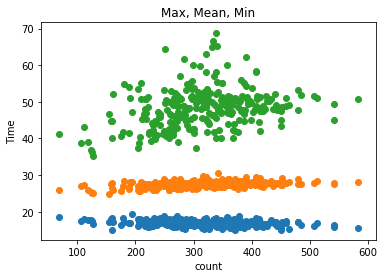

In [252]:
plt.scatter(x,ymin)
plt.scatter(x,ymean)
plt.scatter(x,ymax)
plt.title('Max, Mean, Min')
plt.xlabel('count')
plt.ylabel('Time')
plt.show()

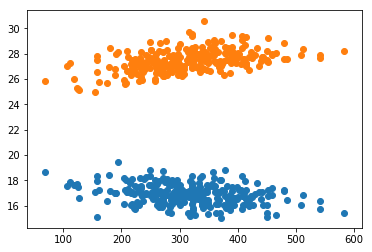

In [30]:
plt.scatter(x,ymin)
plt.scatter(x,ymean)
plt.show()
#do regres